In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Integration

## Computing the area under a curve

In [55]:
def plot_area(x_range, f, label = ""):
    plt.plot(x_range, f(x_range), label = label)
    plt.fill_between(x_range, 0, f(x_range), alpha = 0.25)
    plt.title("Area below a curve")

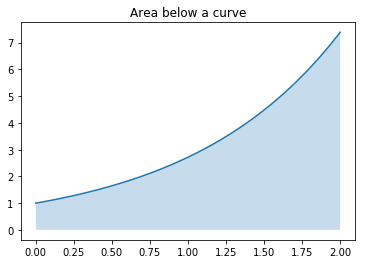

In [80]:
a = 0
b = 2
x_range = np.linspace(a,b,1000)
f = lambda x: np.exp(x)
plot_area(x_range, f, "exp(x)")

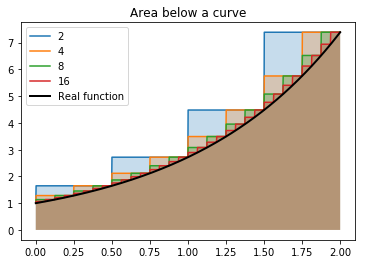

In [81]:
fN = lambda x,N = 2: f(np.ceil(x*N)/N)
plot_area(x_range, fN, label=str(2))
fN = lambda x,N = 4: f(np.ceil(x*N)/N)
plot_area(x_range, fN, label=str(4))
fN = lambda x,N = 8: f(np.ceil(x*N)/N)
plot_area(x_range, fN, label=str(8))
fN = lambda x,N = 16: f(np.ceil(x*N)/N)
plot_area(x_range, fN, label=str(16))
plt.plot(x_range, f(x_range), c="k", lw=2, label = "Real function")
plt.legend(loc="best")

$$\int_a^b f(x) dx = \lim_{N \rightarrow \infty} \sum^{N-1}_{n=1} f(x_n) \Delta x_{n} = \lim_{N \rightarrow \infty} \sum^{N-1}_{n=1} f(x_n) \left(x_{n+1} - x_{n} \right)$$

In [92]:
def integral(a, b, f, N):
    x_range = np.linspace(a,b,N)
    dx = (b-a)/N
    f_values = [f(x) for x in x_range]
    return sum([fx*dx for fx in f_values])

Text(0.5, 0, 'Number segments')

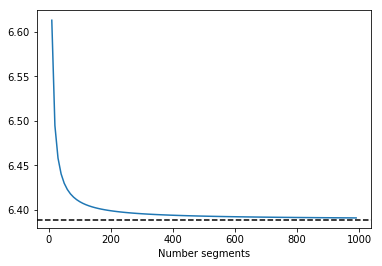

In [93]:
N_range = range(10,1000,10)
plt.plot(N_range, [integral(a,b,lambda x: np.exp(x), N) for N in N_range])
plt.axhline(np.exp(b) - np.exp(a), c = "k", ls="--")
plt.xlabel("Number segments")

## Solving integrals in the hard way

$$\int_0^b x^2 dx = \lim_{N \rightarrow \infty} \sum^{N-1}_{n=1} x_n^2 \Delta x $$

$$ \Delta x = \frac{b}{N} $$

$$ x_n = n \Delta x = \frac{n}{N} b $$

$$ \sum^{N-1}_{n=1} x_n^2 \Delta x = \sum^{N-1}_{n=1} \frac{n^2}{N^3} b^3 = \frac{b^3}{N^3} \sum^{N-1}_{n=1} n^2 $$

$$ \sum^{N-1}_{n=1} n^2 = \frac{(N-1)N(2N -1)}{6} $$

$$ \sum^{N-1}_{n=1} x_n^2 \Delta x = b^3 \frac{(N-1)N(2N -1)}{6 N^3} = b^3 \frac{2N^3 -3 N^2 + 6}{6 N^3}$$

$$\int_0^b x^2 dx = \lim_{N \rightarrow \infty} b^3 \frac{2N^3 -3 N^2 + 6}{6 N^3}= b^3 \lim_{N \rightarrow \infty} \frac{2N^3}{6 N^3} = \frac{1}{3} b^3 $$

### Exercises

1) Show that:
$$\int_0^b x ~dx = \frac{1}{2} b^2 $$

using the following formula:

$$ \sum_{n=1}^{N-1} n = \frac{N (N-1)}{2} $$. 

2) Show the same result using basic geometry.

2) Show that:
$$\int_0^b x^3 dx = \frac{1}{4} b^4 $$

using the following formula:

$$ \sum_{n=1}^{N-1} n^3 = \left(\sum_{n=1}^{N-1} n\right)^2 $$. 



## Differentials 

 Given a function $g(x)$, we can obtain a finite difference $\Delta g(x) = g(x + h) - g(x)$. Analogously, the **differential** $d g(x)$ which represents an infinitesimally small difference in the value of $g(x)$. 

More precisly, a differential is a object that is used for integrating a function by generating finite differences. For example, the object $dx$ in our previous definition of integral is a **differential** that generates differences of the form $(x + h) - x$.

More generally, the integral of a function $f(x)$ with respect of the $dg(x)$ is defined as follows:

$$\int_a^b f(x) dg(x) = \lim_{N \rightarrow \infty} \sum^{N-1}_{n=1} f(x_n) \Delta g(x_{n}) = \lim_{N \rightarrow \infty} \sum^{N-1}_{n=1} f(x_n) \left(g(x_{n+1}) - g(x_{n}) \right)$$

Note that our previous definition of integral is a special case of this new definition with the differential of the identity function $g(x) = x$.

In [94]:
def integral(a, b, f, g, N):
    x_range = np.linspace(a,b,N)
    dx = (b-a)/N
    f_values = [f(x) for x in x_range]
    dg_values = [g(x + dx) - g(x) for x in x_range]
    return sum([fx*dgx for fx, dgx in zip(f_values, dg_values)])

Text(0.5, 0, 'Number segments')

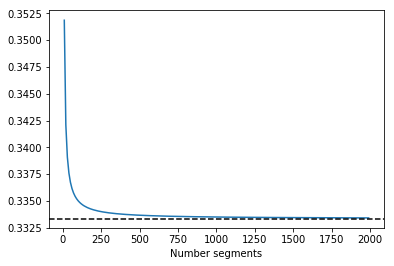

In [87]:
N_range = range(10,2000,10)
plt.plot(N_range, [integral(0,1,lambda x: x**2, lambda x: x, N) for N in N_range])
plt.axhline(1/3., c = "k", ls="--")
plt.xlabel("Number segments")

## Some simple rules for differentials

### Linearity 
Let $\alpha$ and $\beta$ be two numbers:
$$ d (\alpha~ f(x) + \beta~ g(x)) = \alpha~ df(x) + \beta~ dg(x) $$

### Product rule

$$ d \left(f(x) g(x) \right) = g(x) df(x) + f(x) dg(x) $$

### Chain rule

$$ d \left( f\big(y(x)\big) \right) = \frac{df}{dy}(y(x)) dy(x)$$

As special case, if $y(x) = x$, we get the MOST IMPORTANT FORMULA OF THIS COURSE:

$$ d f(x)  = \frac{df}{dx} dx$$

This is the FOUNDAMENTAL theorem of calculus.

### Exercises:

1) Compute the following differentials using linearity, product rule and chain rule:

a) $ d \left(x^3 \cos(2x) + x\right) $

b) $ d \left(\cos(e^x) \right) $

a) $ d \left(x^3 + 2x^2 + 3 \right) $

2) Show that:
$$\int_0^b x ~dx^2 = 2 \int_0^b x^2 ~dx = \frac{2}{3} b^3 $$

## Solving integrals in the easy way: The foundamental theorem of calculus

$$\frac{df}{dx} dx = d f(x) $$

$$ \int_a^b \frac{df}{dx} dx = \int_a^b df(x) = \lim_{N \rightarrow \infty} \sum_{n=1}^N (f(x_{n+1}) - f(x_n)) = \lim_{N \rightarrow \infty} \left( f(x_N) - f(x_1) \right) = f(b) - f(a)$$

### How to solve an integral

1) Find $F(x)$ such that:
$$ \frac{dF}{dx} = f(x) $$

2) Use the foundamental theorem:
$$ \int_a^b f(x) dx = \int_a^b dF(x) = F(b) - F(a) $$

#### Example 1
$$ \frac{d \left( \frac{1}{3}x^3 \right)}{dx} = x^2 $$
$$ \int_0^{b} x^2 dx = \frac{1}{3} \int_0^{b} d x^3 = \frac{1}{3} \left(b^3 - 0^3\right) = \frac{1}{3} b^3$$

#### Example 2
$$ \frac{d \sin(x)}{dx} = \cos(x) $$
$$ \int_0^{\pi/2} \cos(x) dx = \int_0^{\pi/2} d\sin(x) = \sin(\pi/2) - \sin(0) = 1 - 0 = 1$$

Text(0.5, 0, 'Number segments')

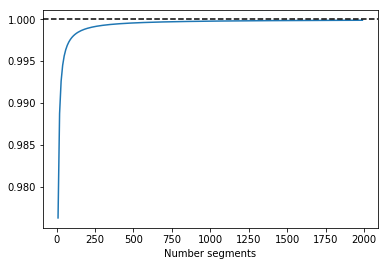

In [90]:
N_range = range(10,2000,10)
plt.plot(N_range, [integral(0,np.pi/2,lambda x: np.cos(x), lambda x: x, N) for N in N_range])
plt.axhline(1., c = "k", ls="--")
plt.xlabel("Number segments")

## Some tricks for solving integrals

### Integration by parts

### Sostitution of variables